
<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/6gCsHd6/1200px-Pandas-logo-svg.png width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">Data Analysis with Python</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Session - 07</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#4d77cf; font-size:200%; text-align:center; border-radius:10px 10px;">Handling with Missing Values</p>

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [TYPE OF NAN VALUES](#1)
* [DETECTING MISSING VALUES](#2)
* [CONVERTING INAPPROPRIATE VALUES TO NAN VALUES](#3)    
* [MISSING VALUE HANDLING METHODS](#4)    
* [THE END OF THE SESSION - 07](#5)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [ ]:
# Buraya kadar numpy, pandas ın temellerini gördük. Şimdi missing values da
# .. bunların bazılarını kullanacağız.
# Bu günkü konularımız
# 1.What is Missing Value?
# 2.Types of Missing Values
# 3.Handling with Missing Values
# 4.Some Useful Methods

# Eda dan sonra yapacağımız şey missing values ları handle etmek
# NOT : Çözüm için net metod yok(Veriden veriye değişiklik gösteriyor)
# NaN : Not a Number
"""
index   car_price
1          22.000
2          24.000
3          NaN
4          28.000
5          NaN
"""
# Missing Value neden oluşur?
# 1.Manuel girerken oluşabilir
# 2.Cihazdan alıyorsak veriyi (cihazda hata vs)
# 3.Yanlış ölçümler

#Types of missing values
# 1.Missing completely at random(MCAR)
###.Follow no discernable pattern
###.Cannot be predicted from the remaining know variable
###.Example: data generated explicitly at random or survey data using a random subset
# .. of questions from a pre-defined list
# 2.Missing at Random(MAR)
### Errors with recording the data correctly
### Can roughly be interpolated from remaining values to a reasonable degree of accuracy
### Example: A sensor that misses a particular minutes measurements
# 3.Missing not at random(MNAR)
### Why the data is missing is known
### Can not effectively be inferred or predicted
### Example: people in a certain age/income brackert refuse to answer how many houses or cars they have
# 4.Structurally missing
### The missing data is missing for an apparent reason
### Mechanism that caused the missing data is easily inferred
### Example: a survey  that asks for income from employment would have missing values for those who don't have a job

In [ ]:
# Handling with missing values?
# 1.Remove the missing data instances:(This method should be acceptable if there are few missing values and you have a lot of data)
# 2.Imputation methods(This is a common approach it allows most models to function as usual without any modifications)
# 3.Keep the missing values and use model which incorporates them(This methods limits the data. BIZ BUNU KULLANMAYACAĞIZ)

# Alttaki ilk 3 ünü kullanacağız
# 1.Countinuous: mean, median, mode
# 2.Categorical: mode
# 3.Othe Methods: ffill(forward fill), bfill(back fill), interpolate(linspace mantığına benzer dolduruyor)
# 4.Prediction of Missing values(Bir sütunla başka sütun arasında korelasyon varsa diğer sütuna bakarak ML ile tahmin edebiliriz. Not: Çok kullanılmıyor)
# 5.Using DL(Datawig): Datawig bir kütüphane. Missing value ları doldurma ile alakalı kütüphane

# Example: 3 araba modelimiz var diyelim. Biz araçların eksik değerlerini dolduracağım(Beygir gücü)
# .. Eğer mean ile doldursam mean:200 olsun, bununla doldurayım desem renault yu 200 girersem yüksek olur
# .. audi için doldursam 200 az olur. O yüzden gruplandırma yapacağız ve daha doğru sonuç elde edeceğiz
# .. Bu sefer renault ların ortalamasını alıp boş olan renault u mean ile doldurup, aynı şeyi
# .. audi vs için de yapabilirim.

# The most important point when handling with missing value : DOMAIN KNOWLEDGE
# Yukarda araba örneği bilgi sahibi olduğumuz bir şeydi ama mesela TIP ile alakalı
# .. bir konuda bilgi sahibi biriyle vs konuşup, araştırma yapmalıyız gerekirse

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])
# NOT: NaN değerler yukarda farklı şekillerde oluşturulmuş(np.nan ve None)
# Status: FT: Full time, PT: Part-Time
# salary: 54000, 59000 vs gibi düşünelim bunuda
df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [12]:
# Not: Yukarda çıktıda bazı değerler "NaN", bazı değerler "nan" şeklinde görünüyor
# .. Bunun neden o arrayde "-" olduğu için object olarak aldı veritipini ve "nan" yazdı
# .. v2 dekiler de integerlar var o yüzden "NaN" yazıyor

# Bazı Notlar
print(0 * np.nan)               # nan
print(np.nan == np.nan)         # DIKKAT: False
print(np.inf > np.nan)          # False
print(np.nan - np.nan)          # nan
print(np.nan + np.nan)          # nan
print(np.nan - 10)              # nan
print(np.nan + 10)              # nan
print(np.nan in set([np.nan]))  # DIKKAT: True
print(np.nan is np.nan)         # DIKKAT: True

nan
False
False
nan
nan
nan
nan
True
True


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Type of NaN Values</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [13]:
# Verimizi önce bir inceleyelim
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [14]:
# Yukarda görünen non-null değerleri doğru mu kontol edelim
# Çünkü bazı yerde NaN yazar ama o stringtir görünmüyordur vs bunu kontrol etmekte fayda var
# NOT: type(np.NaN) # dtype: float gelecek

In [15]:
type(np.nan)  # default  float

float

In [16]:
type(np.NaN)  # Float

float

In [6]:
type(None) # Bazı yerlerde "None" yazmak veri tiplerinden dolayı o sütunu 
# .. doldurmaya çalışırken hata döndürebilir. O yüzden None ları np.NaN a çevirmeniz gerekebilir

NoneType

In [7]:
df.salary # Burada dtype: object, NaN değerler olduğu için kapsayıcı görevinde o yüzden object görünüyor

0      NaN
1       54
2       59
3      120
4       58
5       75
6     None
7      136
8       60
9      125
10     NaN
Name: salary, dtype: object

In [9]:
type(df.salary[0])  # float

float

In [10]:
type(df.salary[6])  # NoneType

NoneType

In [11]:
# Normal değere bakalım bi der
type(df.salary[1])

int

In [12]:
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [17]:
# Buradaki(df.status) elemanların tiplerini inceleyelim
type(df.status[2])  # str

str

In [18]:
type(df.status[10]) # float #Liste içerisindeki elemanlar kendi dtype larını koruyabilir o yüzden float geldi
# .. ama array de durum farklı olacak çünkü array tek tip veri tutuyordu(En kapsamlısını tutacak array)
# .. Aşağıdaki örneğe bakalım

float

In [19]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [20]:
type(df.var1[3])   # DIKKAT: str(Normalde floattı ama string ifade var 9. indexte o yüzden string yaptı)
# .. Ama array için böyle, liste olsaydı dtype float gelecekti(Üstte bahsedildi)

str

**What is the None keyword in Python? [ANSWER01](https://www.educative.io/edpresso/what-is-the-none-keyword-in-python), [ANSWER02](https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object)**

**Difference between None and NaN in Pandas [ANSWER01](https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas), [ANSWER02](https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb)**

**Difference between np.nan and np.NaN [ANSWER](https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan)**

**Difference between nan and 'nan' in Python [ANSWER01](https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python), [ANSWER02](https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b)**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Detecting Missing Values</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

**``NaN``**, standing for "Not A Number", is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

**``NaN``** is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [21]:
# Missing values ları tespit etmeden önce verimizi hatırlayalım
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [17]:
df.isnull()   # isnull = Null olanlar # NaN/nan/None değerleri True olmayanları False döndürecek
# 2. yol # df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [18]:
df.notnull()  # notnull = Null olmayanlar # Yukarıdaki kodun tam tersi
# 2. yol df.notna

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [19]:
df.isnull().any() # Herhangi bir sütunda Null değer var mı gösteriyor

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [20]:
df.isnull().any(axis=1) # Sütunlar boyunca satır bazında bakıyor.Yani mesela;
# 0. indexteki satırda null değer var mı? --> True

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [21]:
df.isnull().sum() # Sütun bazında kaç tane null değer var gösteriyor

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [22]:
df.isnull().sum().sum() # Tüm dataframe de kaç tane null değer var gösteriyor

9

In [23]:
df.salary.isnull() # Seriye isnull uyguladık(Not: isnull, Seriye de uygulanabiliyor). Salary sütunu için
# .. satır satır null olup olmadığını gösteriyor

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10     True
Name: salary, dtype: bool

In [24]:
df.salary.isnull().any()  # Salary sütununda null değer var mı gösteriyor

True

In [25]:
df.salary.isnull().sum()  # Salary sütununda toplam kaç tane null değer olduğunu gösteriyor

3

In [26]:
df.isnull().sum()/len(df)*100   # Sütunların yüzde kaçı null gösterir.

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

In [27]:
df.isnull().any(axis=1) # Bunu yukarda yapmıştık
# .. Sütunlar boyunca satır bazında bakıyor.Yani mesela;
# .. 0. indexteki satırda null değer var mı? --> True
# Bunu df bazında filtreleme yaparsak; True olan satırları alarak, sütunları(axis=1) getirsin

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [28]:
df[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
8,P009,M,PT,NaN,14,3.0,60
10,P011,M,NaN,AWS,6,9.0,NaN


In [29]:
df[~df.isnull().any(axis=1)] # Tilda işareti :Kendisinden sonra gelenin tam tersini yap
# DIKKAT 3. indexi nan görmüyor, string ile alakalı bir durum(Tekrar inceleyelim sonra)

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
7,P008,F,-,FS,10,2.0,136
9,P010,F,FT,DS,-,7.0,125


In [30]:
df.loc[df.dept.isnull(),"salary"] # dept sütununda boş olan yerlere denk gelen satırlardaki salary leri getirdi

5    75
8    60
Name: salary, dtype: object

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Converting Inappropriate Values to NaN Values</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

- map()
- replace()

In [31]:
df['var1'].map({"-":np.nan}) # Belirtmediğim ne kadar yer varsa hepsini NaN a çevirdi
# .. Bunun çözümü için "replace" kullanmalıyız
"""
Notes: When arg parameter is a dictionary, values in Series that are NOT in
the dictionary (as keys) are converted to NaN. However, if the dictionary is 
a dict subclass that defines missing (i.e. provides a method for default values), 
then this default is used rather than NaN SOURCE.
"""

'\nNotes: When arg parameter is a dictionary, values in Series that are NOT in\nthe dictionary (as keys) are converted to NaN. However, if the dictionary is \na dict subclass that defines missing (i.e. provides a method for default values), \nthen this default is used rather than NaN SOURCE.\n'

**Notes:** When **``arg``** parameter is a dictionary, values in Series that are NOT in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN [SOURCE](https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.).

In [32]:
df["var1"].replace(to_replace="-",value=np.nan) # tireyi NaN a çevirdik.
# NOT: df["var1"].replace(to_replace=["-","nan"],value=np.nan) # nan yazan yerleri de böyle "NaN" a çevirebiliriz
# İlgili yere gider element wise bakar, ilgili gördüğü yere verdiğim değeri(replace ettiğim) yazar
# DIKKAT: dtype: Hala object kaldı. Burada herşey float a dönmek için uygun aslında
# .. Ben float olarak görmesini istersem;

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [33]:
df["var1"].replace(to_replace="-",value=np.nan).astype("float")
# Eğer arada object değer kaldıysa, bu kod hata verir
# .. Sizde o sütunda değiştirilecek bir şey olup olmadığına tekrar bakarsınız

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [34]:
df["var1"]  # Gördüğümüz gibi kalıcı olmadı. Kalıcı olması için değişiklik yaptığımız(var1) değişkene eşitleyelim bunu

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [35]:
df["var1"] = df["var1"].replace(to_replace="-",value=np.nan).astype("float")

In [36]:
# Başka sütuna bakalım.
df.status

0      FT
1      PT
2       -
3      FT
4      PT
5      PT
6      FT
7       -
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [37]:
df["status"] = df["status"].replace("-",np.nan)  # Buradaki tireleri NaN a çeviriyoruz(Kalıcı olarak)
df["status"]   # Not: dtype: Object. Buranın Object kalmasında problem yok çünkü sütun zaten stringlerden oluşuyor

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [38]:
# Son bir df imize bakalım tirelerden kurtulduk mu
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [39]:
df["gender"].map({"M":1,"F":0})  # male(M) ler yerine 1, female(F) yerine 0 verelim
# NOT: map fonksiyonunu kullanmanın en uygun olduğu yer burası(üstteki kod)
# Aynısını replace ile yapalım(2. yol)

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

In [40]:
df["gender"].replace({"M":1,"F":0}) # Aynı sonuç gelecektir
# 3. yol # df["gender"].replace(["M", "F"], [1, 0])
# Not: Burada "gender" sütununu "dummy" değişken yaptık aslında(ML de göreceğiz)

0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     0
10    1
Name: gender, dtype: int64

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Missing Value Handling Methods</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

 1. <b>Deleting (Dropping) Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing (Filling) With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ## 1 - Dropping
 
 - dropna()
 - drop()

In [41]:
# df in herhangi bir satırında bir tane bile(how="any") NaN varsa bunları drop edelim
# .. ve "dropna" methodunun default argümanlarını kullanalım
# any : If any NA values are present, drop that row or column.
# all : If all values are NA, drop that row or column Source.
df.dropna(axis=0, how="any", thresh=None, inplace=False)
# Sadece 4 NaN içermiyormuş 

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [42]:
df.dropna(axis=1, how="any", thresh=None, inplace=False) # Sütunlara göre yaptık

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [43]:
df.dropna(axis=1, how="all", thresh=None, inplace=False) # Hepsi("all") NaN ise drop et
# Hiç bir sütunda tüm değerler NaN değil o yüzden hiç bir şey düşmedi
# Ama bunu bir örnekle yeni sütun oluşturarak gösterelim

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [44]:
df["delete_me"] = np.nan # Hepsi nan lardan oluşan sütun
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [45]:
# Şimdi bakalım how="all" nasıl bir sonuç üretecek
df.dropna(axis=1, how="all", thresh=None, inplace=True) # inplace=True olsun
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**``thresh=N``** requires that a column has at least N **non-NaNs to survive.** [Source](https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935)

In [46]:
# thresh=N requires that a column has at least N non-NaNs to survive. Source
df.dropna(axis=1, how="all", thresh=9, inplace=False) # 9 ve fazla NaN olmayan değer varsa,
# .. o sütunu drop etme. Not: Burada how="all" u gözardı ediyor . how="any" yazsak bir şey değişmez
# .. Önce thresh i baz alır.

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


In [47]:
# index numaralarına göre drop etmek istersem;
df.drop([1,3,5])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [48]:
# df.drop(["var1","var2"])  # HATA . axis belirtmeliyim
# df.drop(["var1","var2"], axis=1) # DIKKAT Kalıcı yapmıyoruz şu an bunları
df.drop(columns=["var1","var2"], axis=1)

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


 ## 2 - Filling Missing Values (Imputation)

In [49]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


 #### a.Filling with a specific value

In [50]:
# a.Filling with a specific value
df.fillna(0) # NaN gördüğü tüm değerleri 0 ile dolduracak
# NOT: ilgili sütunun veri tipine göre doldurdu

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [51]:
df.var1.fillna(0) # Sadece var1 sütunu için  NaN gördüğü değerleri 0 ile dolduracak

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 #### b.Filling with any Proper Value

In [52]:
# b.Filling with any Proper Value
# Biz sabit bir değer ile doldurduk, başka değerlerle doldurmaya bakalım
df.var1.mean()  # 6.0

6.0

In [53]:
df.var1.fillna(df.var1.mean()) # var1 in NaN değerlerini var1 in mean i ile(6.0 ile) doldur

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [54]:
# Başka bir şeye bakalım
df.mean() # Sayısal sütunların ortalamalarını verdi

C:\Users\cansi\AppData\Local\Temp/ipykernel_5432/3744241575.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean() # Sayısal sütunların ortalamalarını verdi


var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [55]:
df.fillna(df.mean()) # Sütunlardaki boşlukları o sütunun ortalamasına göre doldurdu
# .. Çok kullanılmıyor bu ama gösterdik.

C:\Users\cansi\AppData\Local\Temp/ipykernel_5432/3214063124.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean()) # Sütunlardaki boşlukları o sütunun ortalamasına göre doldurdu


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [56]:
df.fillna({"dept":"other","var1":df.var1.mean(), "var2":df.var2.median()})
# dept sütunundaki NaN lara "other" dedik, var1 deki NaN ları var1 in mean i ile
# .. var2 deki NaN ları var2 nin median ı ile doldurduk

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


**where() Replace values where the condition is False.**

In [57]:
# where() Replace values where the condition is False
# Where ile atama yaparken False olan yerlere atama yapacağız
df.notna() # Önce buna bakalım. Bunu altta "condition" olarak koyacağız

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [58]:
df.where(cond = df.notna(), other=df.mean(), axis=1) # Condition da False gördüğü
# .. yerlere ilgili sütunların ortalamalarına göre atama yaptı
# .. NOT: Bu çok kullanılmıyor. fillna daha çok kullanılıyor

C:\Users\cansi\AppData\Local\Temp/ipykernel_5432/1135015279.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond = df.notna(), other=df.mean(), axis=1) # Condition da False gördüğü


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


**Fill NaN values using an interpolation method.**

In [59]:
# Fill NaN values using an interpolation method
df.interpolate() # Orjinal df de var1 de 3. index NaN dı
# .. 2. indexteki değeri : 5, 4.indexteki değeri:7, ortalamasını aldı ve
# .. 3. indexe :6 dedi vs vs
# .. interpolate bunu yapıyor
# .. Peki salary de bunu neden yapmadı? "None" type olduğu için yapmadı
# .. Ders başında "None" tipin sıkıntı çıkarabileceğini not almıştık
# .. salary nin 0. indexinden önce değer olmadığı için atama yapamadı ve 
# .. salary nin 10. indexinden sonra değer olmadığı için atama yapamadı

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,8.0,75
6,P007,M,FT,FS,5.5,5.0,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,10.0,7.0,125


For more information about [interpolation](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/)

 #### c.Filling the Missing Values of Categorical Variables

In [60]:
# c.Filling the Missing Values of Categorical Variables
# Kategorik verileri nasıl dolduracaz şimdi buna bakalım
df.dept.mode() # Mode değeri 1 den fazla verdi. Peki nasıl atayacağım?
# Çözüm için indexleme yapacağız

0    AWS
1     DS
2     FS
dtype: object

In [61]:
df.dept.mode()[0] # Hepsini AWS(0. indexe karşılık gelen değer) ile dolduracak

'AWS'

In [62]:
df.dept.fillna(df.dept.mode()[0]) # 5. ve 8. indexi "AWS" ile doldurdu

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [63]:
df["dept"].fillna(method="ffill") # Yukardan aşağı dolduruyor. 4. indexte DS
# .. olduğu için, 5. indexi de DS ile doldurdu

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

In [64]:
df["dept"].fillna(method="bfill")  # Aşağıdan yukarı dolduruyor. 9. indexte DS
# .. olduğu için, 8. indexi de DS ile doldurdu.

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [65]:
# Not: method un eşitine ;
# a.pad / ffill: propagate last valid observation forward to next valid
# b.backfill / bfill: use next valid observation to fill gap
# yazabilirim
# Örneğin oranı bozmayayım benim kategorik değişkenim dağılımı değişmesin dersek
# .. bu ffill ve bfill i kullanabiliriz
# NOT: NaN değerler başta ve sonda ise önce bfill sonra ffill ya da önce ffill sonra bfill
# .. yapacak şekilde oraları doldurabiliriz

 #### d.Filling by condition & by Group of the Categorical Variables 

In [66]:
# d.Filling by condition & by Group of the Categorical Variables
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [67]:
df.dept.fillna(method="ffill",inplace=True) # Kalıcı olarak "dept" sütununu dolduralım

In [68]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the missing values at "status" column with defined condition by "salary"**

In [69]:
# Let's fill the missing values at "status" column with defined condition by "salary"
df.loc[df["salary"]>=100, "status"] # Maaşı 100000 dolardan fazla olan statuslar
# Bu çıktıya bakarak buradaki(7.index) NaN ı FT olarak doldurabilirim diyorum

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [70]:
df.loc[df["salary"]<=100, "status"] # Bu çıktıya bakarak da NaN değer PT dır diyorum

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [71]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True) # condition a denk gelen değerleri yine o condition a denk gelen yerlerin mode u ile dolduruk(Not: mode()[0] yerine mode() yazılsa da olur)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df # status de NaN değerler var hala. Olmadı. Neden? loc la bir doldurma yapacaksanız "inplace=True" çalışmaz
# .. inplace çıkaralım ve conditiona alttaki değişikliği eşitleyeceğiz

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [72]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df
# NOT: salary de son indexteki değer "NaN" status te de "NaN" olduğu için orası(status son index) NaN olarak kaldı
# Bunu transform metoduyla ile çözeceğiz birazdan

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,PT,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


**Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"**

In [73]:
# Let's fill the last missing value at "status" column with the mode of the group of "gender" and "dept"
# df.groupby(["gender","dept"])["status"].mode() # HATA
df.groupby(["gender","dept"])["status"].apply(lambda x:x.mode()[0]) 

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [74]:
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]) # Üstteki çıktıya bakarak F-AWS gördüğü yere FT 
# F-DS gördüğü yere FT vs vs yaptı. Bunu yeni bir sütun olarak ekleyelim

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [75]:
df["trans_status"] = df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


In [76]:
df.status.fillna(df.trans_status, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


**Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"**

In [77]:
# Let's fill the missing values at "salary" column with the mean of the group of "status" and "dept"
df.groupby("dept").salary.mean() # Bu değerlerle veriyi doldurmak mantıklı olmayabilir ama;

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [78]:
df.groupby(["status", "dept"]).salary.mean() # status te FT , dept te DS gelen yerlerin salary ye karşılık gelen değerlerinin ortalamasını aldık.
# Bunu transform da sütun oluşturmak için kullanıp sonra o oluşturduğumuz sütunu salary deki NaN değerleri doldurmak için kullanacağız

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [79]:
df

,id,gender,status,dept,var1,var2,salary,trans_status
0,P001,M,FT,DS,2.0,8.0,NaN,FT
1,P002,F,PT,FS,3.0,NaN,54,FT
2,P003,M,PT,AWS,5.0,5.0,59,PT
3,P004,F,FT,AWS,NaN,8.0,120,FT
4,P005,M,PT,DS,7.0,11.0,58,FT
5,P006,F,PT,DS,1.0,NaN,75,FT
6,P007,M,FT,FS,NaN,NaN,None,FT
7,P008,F,FT,FS,10.0,2.0,136,FT
8,P009,M,PT,FS,14.0,3.0,60,FT
9,P010,F,FT,DS,NaN,7.0,125,FT


In [80]:
df.groupby(["status", "dept"]).salary.transform("mean") # Yeni bir seri oluşturduk. Bunu da ayrı bir sütun yapalım

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [81]:
df["trans_salary"] = df.groupby(["status", "dept"]).salary.transform("mean")
df # Yukarıdaki yaptığımızla aynı mantıkla 125.0 i salary nin ilk değerine verecek, 136.0 yı salary de "None" yazan
# .. yere verecek vs vs(Altta bunu yapalım)

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75,FT,66.5
6,P007,M,FT,FS,NaN,NaN,None,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125,FT,125.0


In [82]:
df.salary.fillna(df.trans_salary, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,FT,125.0


**Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"**

In [83]:
# Let's fill the missing values at "var1" column with the mean of the group of "gender" and "status"
df.groupby(["gender", "status"]).var1.mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [84]:
trans_var1 = df.groupby(["gender", "status"]).var1.transform("mean")

In [85]:
df.var1.fillna(trans_var1, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,FT,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.0,59.0,PT,59.0
3,P004,F,FT,AWS,10.0,8.0,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,FT,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,FT,66.5
6,P007,M,FT,FS,2.0,NaN,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,FT,57.0
9,P010,F,FT,DS,10.0,7.0,125.0,FT,125.0


**Let's fill the missing values at "var2" column with the mean of group of "status"**

In [86]:
# Let's fill the missing values at "var2" column with the mean of group of "status"
trans_var2= df.groupby(["status"]).var2.transform("mean")
trans_var2

0     6.25
1     7.00
2     7.00
3     6.25
4     7.00
5     7.00
6     6.25
7     6.25
8     7.00
9     6.25
10    7.00
Name: var2, dtype: float64

In [87]:
df.var2.fillna(trans_var2, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_status,trans_salary
0,P001,M,FT,DS,2.0,8.00,125.0,FT,125.0
1,P002,F,PT,FS,3.0,7.00,54.0,FT,57.0
2,P003,M,PT,AWS,5.0,5.00,59.0,PT,59.0
3,P004,F,FT,AWS,10.0,8.00,120.0,FT,120.0
4,P005,M,PT,DS,7.0,11.00,58.0,FT,66.5
5,P006,F,PT,DS,1.0,7.00,75.0,FT,66.5
6,P007,M,FT,FS,2.0,6.25,136.0,FT,136.0
7,P008,F,FT,FS,10.0,2.00,136.0,FT,136.0
8,P009,M,PT,FS,14.0,3.00,60.0,FT,57.0
9,P010,F,FT,DS,10.0,7.00,125.0,FT,125.0


## filling with Interpolation

Pandas **``dataframe.interpolate()``** function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value [Source 01](https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/) & [Source 02](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [88]:
#########################################
# Filling with Interpolation
# Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value Source 01 & Source 02
flights = sns.load_dataset("flights")
flights # Yıl ve aylardan oluşan, uçuşlara katılan yolcu sayısı(örn:0.index 1949-Jan-122000)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [89]:
flights.info() # Boş değer yok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


<AxesSubplot:>

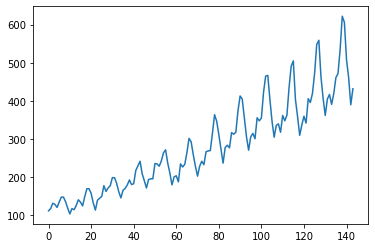

In [90]:
flights.passengers.plot()    # default değeri "lineplot"
# Bu grafikte yıllara göre artmalar olmuş bunu görüyoruz
# Bu time series bir data 

In [91]:
# Passengers sütununda rasgele NaN değerler oluşturalım önce, sonra bunları dolduracağız
# Orginal datamda değişiklik olmasın copy oluşturalım
flights_copy = flights.copy()

In [92]:
flights_copy.loc[np.random.randint(1,144,20), "passengers"] # default olarak random olarak index numarası(solda) ve onlara karşılık gelen passenger değerlerini gösteriyor(sağda)
# Bunların hepsini "NaN" değer yapalım

4      121
123    396
29     178
77     315
117    359
131    405
93     306
103    467
41     218
89     374
103    467
100    355
115    505
65     264
38     193
59     201
55     272
52     229
59     201
68     259
Name: passengers, dtype: int64

In [93]:
flights_copy.loc[np.random.randint(1,144,20), "passengers"] = np.nan

In [94]:
flights_copy.isnull().sum() # 18 geldi çünkü bazı random değerleri aynı değerler seçtiği için 18, 
# .. hiç üst üste seçmeyip 20 de gelebilirdi, şu an 18 geldi. 2 tane indexi aynı index seçmiş randomly

year           0
month          0
passengers    18
dtype: int64

<AxesSubplot:>

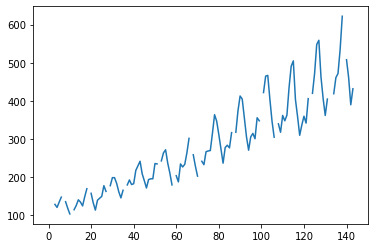

In [95]:
flights_copy.passengers.plot() # Şimdi bu grafikte eksikler olduğunu görüyoruz

<AxesSubplot:>

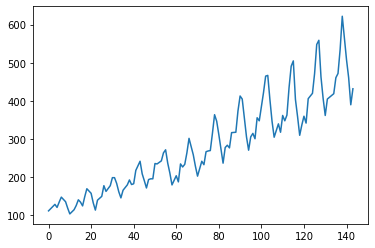

In [99]:
# Şimdi doldurulmuş hali ve orjinalini karşılaştıralım
flights_copy.passengers.interpolate().plot() # Interpolate ile doldurulmuş hali

<AxesSubplot:>

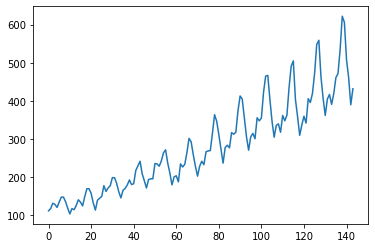

In [101]:
flights.passengers.plot() # Orjinal hali
# Pek bir farklılık yok gibi, güzel doldurmuş interpolate

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:150%; text-align:center; border-radius:10px 10px;">The End of The Session - 07</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

________